In [1]:
import selenium
from selenium import webdriver
import pandas as pd
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')
import time

from selenium.common.exceptions import NoSuchElementException

from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import requests
from bs4 import BeautifulSoup


# Q1

Write a python program which searches all the product under a particular product from www.amazon.in. The
product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for
guitars

In [2]:
driver = webdriver.Chrome()
driver.get('https://www.amazon.in/')
time.sleep(2)

In [3]:
#search for guitar
search = driver.find_element(By.XPATH , '/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search.send_keys('guitar')

#click on seaarch button
driver.find_element(By.XPATH , '/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input').click()

# Q2

In the above question, now scrape the following details of each product listed in first 3 pages of your search
results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then
scrape all the products available under that product name. Details to be scraped are: "Brand
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [4]:
url = []
for page in range(0,3):
    for i in driver.find_elements(By.XPATH , '//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]'):
        url.append(i.get_attribute('href'))
        
    driver.find_element(By.XPATH , '//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]').click() 
    time.sleep(5)  

In [6]:
len(url)

177

In [31]:
brand = []
for i in url:
    driver.get(i)
    time.sleep(4)
    try:
        
        name_of_brand = driver.find_element(By.XPATH , '/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[46]/div/table/tbody/tr[1]/td[2]/span')
        brand.append(name_of_brand.text)
    
    except NoSuchElementException:
        brand.append('-')   

In [16]:
return_exchange = []
product = []
price = []
expected_delivary = []
availibilty = []
for i in url:
    driver.get(i)
    time.sleep(4)
    try:
        
        
        exchange = driver.find_element(By.XPATH , '/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[23]/div[2]/div/div/div/div[2]/div/ol/li[3]/div/span/div[2]/span')
        return_exchange.append(exchange.text)
        
        name_of_product = driver.find_element(By.XPATH , '//span[@id="productTitle"]')
        product.append(name_of_product.text)
        
        num_of_price = driver.find_element(By.XPATH , '//span[@class="a-price-whole"]')
        price.append(num_of_price.text)
        
        delivary = driver.find_element(By.XPATH , '//span[@class="a-text-bold"]')
        expected_delivary.append(delivary.text)
        
        stock = driver.find_element(By.XPATH , '//div[@id="availability"]')
        availibilty.append(stock.text)
    
    except NoSuchElementException:
        
        return_exchange.append('-')
        product.append('-')
        price.append('-')
        expected_delivary.append('-')
        availibilty.append('-')
        

In [32]:
guitars = pd.DataFrame()
guitars['Brand'] = brand
guitars['Prouduct Name'] = product
guitars['Price'] = price
guitars['Expected Delivary'] = expected_delivary
guitars['Return-Exchange'] = return_exchange
guitars['Availibilty'] = availibilty
guitars['Img Url'] = url
guitars

,Brand,Prouduct Name,Price,Expected Delivary,Return-Exchange,Availibilty,Img Url
0,Kadence,"Kadence rosewood Guitar Frontier Series, Elect...","4,999","Saturday, 2 September",7 days Replacement,In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Medellin,Medellin Acoustic Guitar (with guitar learning...,"2,499","Saturday, 2 September",7 days Replacement,In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Kadence,Kadence Slowhand Premium Jumbo Semi Acoustic G...,"11,999","Saturday, 2 September",7 days Replacement,In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Medellin,Medellin Acoustic Guitar (with guitar learning...,"2,499","Sunday, 3 September",7 days Replacement,Only 1 left in stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,JUAREZ,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","1,999","Thursday, 31 August",7 days Replacement,In stock,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...
172,HOVNER,Hovner Carlton Special Quality Rosewood Fretbo...,"4,635","Friday, 8 September",7 days Replacement,In stock,https://www.amazon.in/Carlton-Rosewood-Fretboa...
173,HOVNER,Hovner 215 Royal Metallic Black F-Cut Rosewood...,"4,580","Friday, 8 September",7 days Replacement,Only 1 left in stock,https://www.amazon.in/Hovner-Royal-Metallic-Ro...
174,-,-,-,-,-,-,https://www.amazon.in/Washburn-Dreadnought-Aco...
175,-,-,-,-,-,-,https://www.amazon.in/JUAREZ-Acoustic-Rosewood...


In [33]:
# Export guitars DataFrame to csv
guitars.to_csv('E:\\Datatrained\\internship\\Guitars.csv' , index = False )

# Q3

Write a python program to access the search bar and search button on images.google.com and scrape 10
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [449]:
from selenium.webdriver.common.keys import Keys

In [450]:
#gets fruits images
driver = webdriver.Chrome()
driver.get('https://www.google.com/xhtml')

#click on images
driver.find_element(By.XPATH , '/html/body/div[1]/div[1]/div/div/div/div[1]/div/div[2]/a').click()

#put fruits in search bar
driver.find_element(By.XPATH ,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea').send_keys('fuits')

#click on search
driver.find_element(By.XPATH , '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div').click()














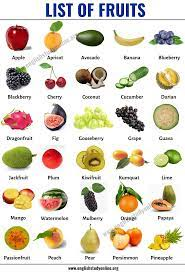
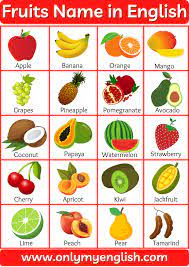
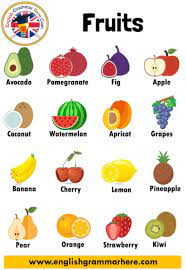
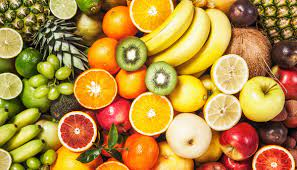
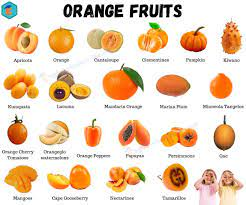

In [256]:
#get url of fruits 10 first images
for i in driver.find_elements(By.XPATH , '//div[@class="isv-r PNCib MSM1fd BUooTd"]//img')[0:10]:
    print(i.get_attribute('src'))
driver.close()    

In [451]:
#gets cars images
driver = webdriver.Chrome()
driver.get('https://www.google.com/xhtml')

#click on images
driver.find_element(By.XPATH , '/html/body/div[1]/div[1]/div/div/div/div[1]/div/div[2]/a').click()

#put fruits in search bar
driver.find_element(By.XPATH ,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea').send_keys('cars')

#click on search
driver.find_element(By.XPATH , '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div').click()














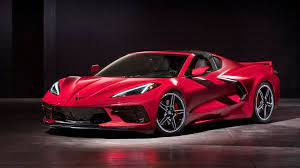
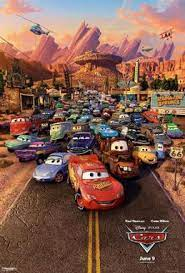
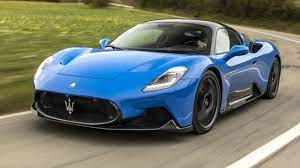
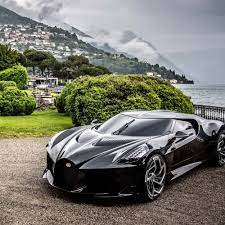
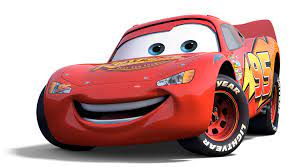

In [453]:
#get url of carss 10 first images
for i in driver.find_elements(By.XPATH , '//div[@class="isv-r PNCib MSM1fd BUooTd"]//img')[0:10]:
    print(i.get_attribute('src'))
driver.close()    

In [454]:
#gets machine learning images
driver = webdriver.Chrome()
driver.get('https://www.google.com/xhtml')

#click on images
driver.find_element(By.XPATH , '/html/body/div[1]/div[1]/div/div/div/div[1]/div/div[2]/a').click()

#put fruits in search bar
driver.find_element(By.XPATH ,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea').send_keys('Machine Learning')

#click on search
driver.find_element(By.XPATH , '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div').click()














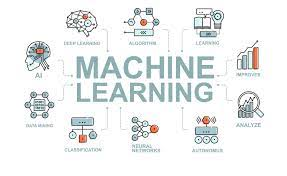
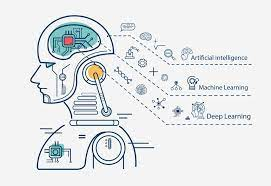
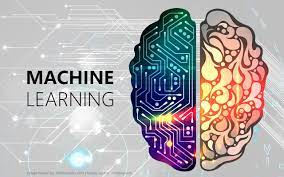
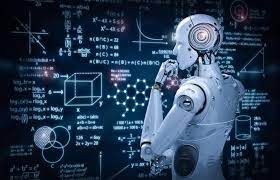
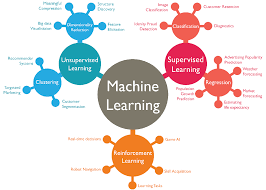

In [455]:
#get url of machine learning 10 first images
for i in driver.find_elements(By.XPATH , '//div[@class="isv-r PNCib MSM1fd BUooTd"]//img')[0:10]:
    print(i.get_attribute('src'))
driver.close()    

In [456]:
#gets guitar images
driver = webdriver.Chrome()
driver.get('https://www.google.com/xhtml')

#click on images
driver.find_element(By.XPATH , '/html/body/div[1]/div[1]/div/div/div/div[1]/div/div[2]/a').click()

#put fruits in search bar
driver.find_element(By.XPATH ,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea').send_keys('Guitar')

#click on search
driver.find_element(By.XPATH , '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div').click()














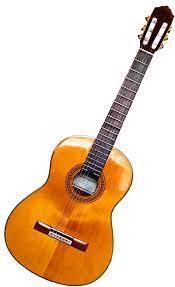
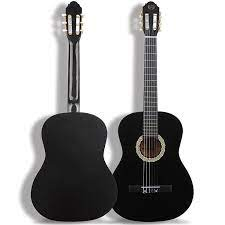
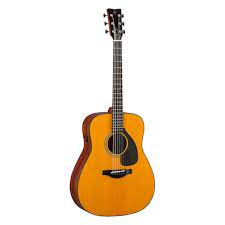
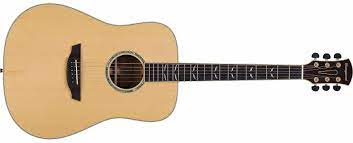
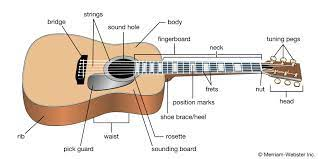

In [457]:
#get url of guitar 10 first images
for i in driver.find_elements(By.XPATH , '//div[@class="isv-r PNCib MSM1fd BUooTd"]//img')[0:10]:
    print(i.get_attribute('src'))
driver.close()    

In [458]:
#gets Cakes images
driver = webdriver.Chrome()
driver.get('https://www.google.com/xhtml')

#click on images
driver.find_element(By.XPATH , '/html/body/div[1]/div[1]/div/div/div/div[1]/div/div[2]/a').click()

#put fruits in search bar
driver.find_element(By.XPATH ,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea').send_keys('Cakes')

#click on search
driver.find_element(By.XPATH , '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div').click()














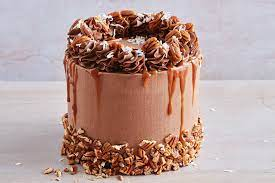
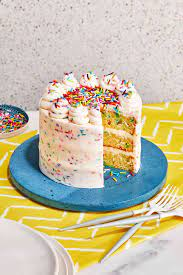
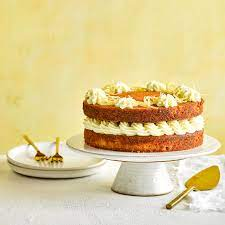
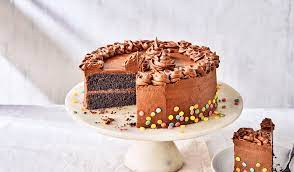
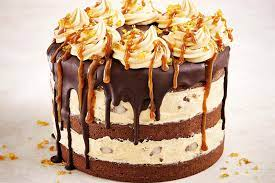

In [459]:
#get url of cakes 10 first images
for i in driver.find_elements(By.XPATH , '//div[@class="isv-r PNCib MSM1fd BUooTd"]//img')[0:10]:
    print(i.get_attribute('src'))
driver.close()    

# Q4

#Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com
and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand
Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the
details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [36]:
driver = webdriver.Chrome()
driver.get('https://www.flipkart.com/')

In [40]:

#search bar
search = driver.find_element(By.XPATH , '/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
search.send_keys('smartphone')

In [42]:
#press search icon
driver.find_element(By.XPATH , '//button[@class="L0Z3Pu"]').click()

In [43]:
#click on type to choose smartphones
driver.find_element(By.XPATH , '/html/body/div/div/div[3]/div[1]/div[1]/div/div[1]/div/section[21]/div/div').click()

In [44]:
#chose smartphones
driver.find_element(By.XPATH , '/html/body/div/div/div[3]/div[1]/div[1]/div/div[1]/div/section[21]/div[2]/div/div[1]/div/label').click()

In [45]:
phone_url = []
for i in driver.find_elements(By.XPATH , '//a[@class="_1fQZEK"]'):
    phone_url.append(i.get_attribute('href'))

In [47]:
len(phone_url)

24

In [48]:
RAM = []
Storage_Rom = []
display = []
primary_camera = []
secondary_camera = []
battery = []
price = []




for i in driver.find_elements(By.XPATH , '//div[@class="_1AtVbE col-12-12"]//ul[@class="_1xgFaf"]/li[1]'):
    RAM.append(i.text.strip().split(' | ')[0])
    Storage_Rom.append(i.text.strip().split(' | ')[1])
    
for i in driver.find_elements(By.XPATH , '//ul[@class="_1xgFaf"]//li[2]'):
    display.append(i.text.strip())  
    
for i in driver.find_elements(By.XPATH , '//ul[@class="_1xgFaf"]//li[3]'):
    primary_camera.append(i.text.strip().split(' | ')[0])
    secondary_camera.append(i.text.strip().split(' | ')[1])

for i in driver.find_elements(By.XPATH , '//ul[@class="_1xgFaf"]//li[4]'):
    battery.append(i.text.strip())

for i in driver.find_elements(By.XPATH , '//div[@class="_25b18c"]/div[@class="_30jeq3 _1_WHN1"]'):
    price.append(i.text.strip())

In [52]:
models = []
colour = []
product_name = []
for k in phone_url:
    driver.get(k)
    time.sleep(2)
    try:
        path = driver.find_element(By.XPATH , '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[1]/table/tbody/tr[4]/td[2]/ul/li')
        colour.append(path.text.strip())
        
        model = driver.find_element(By.XPATH , '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[1]/table/tbody/tr[3]/td[2]/ul/li')
        models.append(model.text.strip())
        
        pro = driver.find_element(By.XPATH , '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
        product_name.append(pro.text)
    
    except NoSuchElementException:
            colour.append('-')
            models.append('-')
            product_name.append('-')

In [53]:
len(product_name)

24

In [55]:
#now instantiate the dataframe:

smartphones = pd.DataFrame()

smartphones['Brand Name'] = models
smartphones['Product Name'] = product_name
smartphones['Colour'] = colour
smartphones['RAM'] = RAM
smartphones['Storage Rom'] = Storage_Rom
smartphones['Display'] = display
smartphones['Primary Camera'] = primary_camera
smartphones['Secondary Camera'] = secondary_camera
smartphones['Battery Capacity'] = battery
smartphones['Price'] = price
smartphones['Product URL'] = phone_url

smartphones

,Brand Name,Product Name,Colour,RAM,Storage Rom,Display,Primary Camera,Secondary Camera,Battery Capacity,Price,Product URL
0,M6 Pro 5G,"POCO M6 Pro 5G (Power Black, 128 GB) (6 GB RAM)",Power Black,6 GB RAM,128 GB ROM,17.25 cm (6.79 inch) Full HD+ Display,50MP + 2MP,8MP Front Camera,5000 mAh Battery,"₹12,999",https://www.flipkart.com/poco-m6-pro-5g-power-...
1,M6 Pro 5G,"POCO M6 Pro 5G (Forest Green, 64 GB) (4 GB RAM)",Forest Green,4 GB RAM,64 GB ROM,17.25 cm (6.79 inch) Full HD+ Display,50MP + 2MP,8MP Front Camera,5000 mAh Battery,"₹10,999",https://www.flipkart.com/poco-m6-pro-5g-forest...
2,M6 Pro 5G,"POCO M6 Pro 5G (Power Black, 64 GB) (4 GB RAM)",Power Black,4 GB RAM,64 GB ROM,17.25 cm (6.79 inch) Full HD+ Display,50MP + 2MP,8MP Front Camera,5000 mAh Battery,"₹10,999",https://www.flipkart.com/poco-m6-pro-5g-power-...
3,C51,"POCO C51 (Power Black, 64 GB) (4 GB RAM)",Power Black,4 GB RAM,64 GB ROM,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera,5MP Front Camera,5000 mAh Battery,"₹6,499",https://www.flipkart.com/poco-c51-power-black-...
4,C50,"POCO C50 (Royal Blue, 32 GB) (2 GB RAM)",Royal Blue,2 GB RAM,32 GB ROM,16.56 cm (6.52 inch) HD+ Display,8MP Dual Camera,5MP Front Camera,5000 mAh Lithium Polymer Battery,"₹5,499",https://www.flipkart.com/poco-c50-royal-blue-3...
5,C55,"POCO C55 (Cool Blue, 128 GB) (6 GB RAM)",Cool Blue,6 GB RAM,128 GB ROM,17.04 cm (6.71 inch) HD+ Display,50MP Dual Rear Camera,5MP Front Camera,5000 mAh Battery,"₹8,499",https://www.flipkart.com/poco-c55-cool-blue-12...
6,C51,"POCO C51 (Royal Blue, 64 GB) (4 GB RAM)",Royal Blue,4 GB RAM,64 GB ROM,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera,5MP Front Camera,5000 mAh Battery,"₹6,499",https://www.flipkart.com/poco-c51-royal-blue-6...
7,12,"REDMI 12 (Moonstone Silver, 128 GB) (6 GB RAM)",Moonstone Silver,6 GB RAM,128 GB ROM,17.25 cm (6.79 inch) Full HD+ Display,50MP + 8MP + 2MP,8MP Front Camera,5000 mAh Battery,"₹11,499",https://www.flipkart.com/redmi-12-moonstone-si...
8,C55,"POCO C55 (Power Black, 128 GB) (6 GB RAM)",Power Black,6 GB RAM,128 GB ROM,17.04 cm (6.71 inch) HD+ Display,50MP Dual Rear Camera,5MP Front Camera,5000 mAh Battery,"₹8,499",https://www.flipkart.com/poco-c55-power-black-...
9,12,"REDMI 12 (Moonstone Silver, 128 GB) (4 GB RAM)",Moonstone Silver,4 GB RAM,128 GB ROM,17.25 cm (6.79 inch) Full HD+ Display,50MP + 8MP + 2MP,8MP Front Camera,5000 mAh Battery,"₹9,999",https://www.flipkart.com/redmi-12-moonstone-si...


In [56]:
# export smartphones dataframe to excel
smartphones.to_csv('E:\\Datatrained\\internship\\Smartphones.csv' , index = False )

# Q5

Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [243]:
driver = webdriver.Chrome()
driver.get('https://www.google.co.in/maps')

In [244]:
#enter city name
city = input('Enter City : ')

#search for it in search bar
search = driver.find_element(By.XPATH , '//input[@jslog="11886"]')
search.send_keys(city)

#click on search button
driver.find_element(By.XPATH , '//button[@jslog="11887"]').click()

Enter City : fayoum


In [246]:
import re

#to find current url of position
current_position = driver.current_url
print(current_position)

#now extract geospatial coordinates 
geo_coordinates = re.findall( r'@(.*)data' , current_position)
print(geo_coordinates)

https://www.google.co.in/maps/place/%D8%A7%D9%84%D9%81%D9%8A%D9%88%D9%85%D8%8C+%D9%82%D8%B3%D9%85+%D8%A7%D9%84%D9%81%D9%8A%D9%88%D9%85%D8%8C+%D8%A7%D9%84%D9%81%D9%8A%D9%88%D9%85%E2%80%AD/@29.310895,30.8628432,14z/data=!3m1!4b1!4m6!3m5!1s0x1459792fa8bf0013:0xa698b3d528236f63!8m2!3d29.3084021!4d30.8428497!16zL20vMGI1anBo?entry=ttu
['29.310895,30.8628432,14z/']


In [251]:
for i in geo_coordinates:
    latitude = i.split(',')[0]
    longitude = i.split(',')[1]
print('latitude = ',latitude ,', longitude = ', longitude)

latitude =  29.310895 , longitude =  30.8628432


# Q6

Write a program to scrap all the available details of best gaming laptops from digit.in.

In [57]:
driver = webdriver.Chrome()
driver.get('https://www.digit.in/top-products/best-gaming-laptops-40.html')

In [63]:
#find Brand Name
Brand = []
for i in driver.find_elements(By.XPATH , '//div[@class="specfpro_details_cont"]//span[@class="datahreflink"]'):
    Brand.append(i.text)
print(Brand)    

['HP OMEN 17 (2023)', 'MSI Titan GT77 12UHS', 'Lenovo Legion 5i Pro', 'ASUS ROG Strix Scar 18 2023', 'Acer Predator Helios Neo 16', 'ASUS ROG Zephyrus G14', 'MSI Cyborg 15']


In [80]:
#find windows
windows = []
for i in driver.find_elements(By.XPATH , '//div[@class="Product-specs"]//div[@class="Specs-Wrap"]//li[1]'):
    
    windows.append(i.get_attribute('title'))
print(windows)    

['Windows 11 Home OS', 'Windows 11 Home OS', 'Windows 11 Home OS', 'Windows 11 Home OS', 'Windows 11 Home OS', 'Windows 11 Home OS', 'Windows 11 Home OS']


In [81]:
#find display
display= []
for i in driver.find_elements(By.XPATH , '//div[@class="Product-specs"]//div[@class="Specs-Wrap"]//li[2]'):
    
    display.append(i.get_attribute('title'))
print(display)    

['17.3" (2560 x 1440) Display', '17.3" (3840 x 2160) Display', '16" (2560 x 1600) Display', '18" (1920 x 1200) Display', '16" (2560 x 1600) Display', '14" (1920 x 1200) Display', '15.6" (1920 x 1080) Display']


In [84]:
# find processor
processor = []
for i in driver.find_elements(By.XPATH , '//div[@class="Product-specs"]//div[@class="Specs-Wrap"]//li[4]'):
    
    processor.append(i.get_attribute('title'))
print(processor)    

['13th Gen Intel Core i7-13700HX | 5.0 GHz Processor', '12th Gen Intel Core i9-12900HX | 3.6 GHz Processor', '12th Gen Intel Core i7-12700H | 4.7 GHz Processor', '13th Gen Intel Core i9-13980HX | 2.2 GHz Processor', '13th Gen Intel Core i7-13700HX  | NA Processor', 'AMD Ryzen 9-6900HS | 4.9 GHz Processor', '12th Gen Intel Core i7-12650H | 4.7 GHz Processor']


In [87]:
#find memory
memory = []
for i in driver.find_elements(By.XPATH , '//div[@class="Product-specs"]//div[@class="Specs-Wrap"]//li[5]'):
    
    memory.append(i.get_attribute('title'))
print(memory)    

['1 TB SSD/16 GB DDR5 Memory', '2 TB SSD/64 GB DDR5 Memory', '1 TB SSD/32 GB DDR5 Memory', '1 TB SSD/32 GB DDR5 Memory', '1 TB SSD/16 GB DDR5 Memory', '1 TB SSD/16 GB DDR5 Memory', '1 TB SSD/16 GB DDR5 Memory']


In [93]:
#find body
body = []
for i in driver.find_elements(By.XPATH , '//div[@class="Spcs-details"]//tbody//tr[7]'):
    body.append(i.text.strip().split(' : ')[1])
print(body)    

['397.1 x 262 x 27 mm dimension & 2.78 kg weight', '397 x 330 x 23 mm dimension & 3.3 kg weight', '359.9 x 264.4 x 19.9 mm dimension & 3.6 kg weight', '294 x 399 x 23 mm dimension & 3.1 kg weight', '360 x 279 x 28 mm dimension & 2.6 kg weight', '312 x 227 x 19 mm dimension & 1.65 kg weight', '& 1.98 kg weight']


In [94]:
#find price
price = []
for i in driver.find_elements(By.XPATH , '//div[@class="Spcs-details"]//tbody//tr[8]'):
    price.append(i.text.strip().split(' : ')[1])
print(price)  

['₹ 269,777', '₹ 499,990', '₹ 179,990', '₹ 279,990', '₹ 149,990', '₹ 156,990', '₹ 125,000']


In [96]:
Laptops = pd.DataFrame()
Laptops['Brand'] = Brand
Laptops['windows'] = windows
Laptops['Display'] = display
Laptops['Processor'] = processor
Laptops['Memory'] = memory
Laptops['Body'] = body
Laptops['Price'] = price
Laptops

,Brand,windows,Display,Processor,Memory,Body,Price
0,HP OMEN 17 (2023),Windows 11 Home OS,"17.3"" (2560 x 1440) Display",13th Gen Intel Core i7-13700HX | 5.0 GHz Proce...,1 TB SSD/16 GB DDR5 Memory,397.1 x 262 x 27 mm dimension & 2.78 kg weight,"₹ 269,777"
1,MSI Titan GT77 12UHS,Windows 11 Home OS,"17.3"" (3840 x 2160) Display",12th Gen Intel Core i9-12900HX | 3.6 GHz Proce...,2 TB SSD/64 GB DDR5 Memory,397 x 330 x 23 mm dimension & 3.3 kg weight,"₹ 499,990"
2,Lenovo Legion 5i Pro,Windows 11 Home OS,"16"" (2560 x 1600) Display",12th Gen Intel Core i7-12700H | 4.7 GHz Processor,1 TB SSD/32 GB DDR5 Memory,359.9 x 264.4 x 19.9 mm dimension & 3.6 kg weight,"₹ 179,990"
3,ASUS ROG Strix Scar 18 2023,Windows 11 Home OS,"18"" (1920 x 1200) Display",13th Gen Intel Core i9-13980HX | 2.2 GHz Proce...,1 TB SSD/32 GB DDR5 Memory,294 x 399 x 23 mm dimension & 3.1 kg weight,"₹ 279,990"
4,Acer Predator Helios Neo 16,Windows 11 Home OS,"16"" (2560 x 1600) Display",13th Gen Intel Core i7-13700HX | NA Processor,1 TB SSD/16 GB DDR5 Memory,360 x 279 x 28 mm dimension & 2.6 kg weight,"₹ 149,990"
5,ASUS ROG Zephyrus G14,Windows 11 Home OS,"14"" (1920 x 1200) Display",AMD Ryzen 9-6900HS | 4.9 GHz Processor,1 TB SSD/16 GB DDR5 Memory,312 x 227 x 19 mm dimension & 1.65 kg weight,"₹ 156,990"
6,MSI Cyborg 15,Windows 11 Home OS,"15.6"" (1920 x 1080) Display",12th Gen Intel Core i7-12650H | 4.7 GHz Processor,1 TB SSD/16 GB DDR5 Memory,& 1.98 kg weight,"₹ 125,000"


# Q7

Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped:
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [98]:
driver = webdriver.Chrome()
driver.get('https://www.forbes.com/billionaires/')

In [128]:
len(driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]'))

14

In [147]:
#find rank 
rank = []
for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[1]'):
    rank.append(i.text)
print(rank)
len(rank)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '31', '33', '34', '35', '35', '37', '38', '39', '40', '41', '41', '43', '43', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '65', '67', '68', '69', '70', '71', '72', '72', '74', '74', '76', '77', '77', '79', '80', '81', '82', '83', '84', '84', '86', '86', '88', '89', '89', '89', '92', '93', '94', '94', '94', '97', '97', '99', '100', '101', '101', '103', '104', '104', '106', '107', '108', '108', '108', '108', '112', '113', '114', '115', '116', '116', '118', '119', '120', '121', '122', '123', '124', '124', '126', '127', '128', '128', '130', '130', '130', '133', '133', '133', '136', '137', '138', '138', '140', '141', '142', '142', '144', '145', '146', '147', '148', '148', '148', '151', '151', '153', '153', '153', '153', '157', '157', '

200

In [148]:
#find name
name = []
for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[2]'):
    name.append(i.text)
print(name)
len(name)

['Bernard Arnault & family', 'Elon Musk', 'Jeff Bezos', 'Larry Ellison', 'Warren Buffett', 'Bill Gates', 'Michael Bloomberg', 'Carlos Slim Helu & family', 'Mukesh Ambani', 'Steve Ballmer', 'Francoise Bettencourt Meyers & family', 'Larry Page', 'Amancio Ortega', 'Sergey Brin', 'Zhong Shanshan', 'Mark Zuckerberg', 'Charles Koch', 'Julia Koch & family', 'Jim Walton', 'Rob Walton', 'Alice Walton', 'David Thomson & family', 'Michael Dell', 'Gautam Adani', 'Phil Knight & family', 'Zhang Yiming', 'Dieter Schwarz', 'François Pinault & family', 'Klaus-Michael Kuehne', 'Giovanni Ferrero', 'Jacqueline Mars', 'John Mars', 'Li Ka-shing', 'Ma Huateng', 'Miriam Adelson & family', 'Ken Griffin', 'Mark Mateschitz', 'Robin Zeng', 'Tadashi Yanai & family', 'Len Blavatnik', 'Alain Wertheimer', 'Gerard Wertheimer', 'Gianluigi Aponte', 'Rafaela Aponte-Diamant', 'Colin Zheng Huang', 'Reinhold Wuerth & family', 'Lee Shau Kee', 'Jeff Yass', 'Jim Simons', 'Stephen Schwarzman', 'Susanne Klatten', 'Gina Rinehart'

200

In [158]:
#find Net Worth 
net_worth = []
for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[3]'):
    net_worth.append(i.text)
print(net_worth)
len(net_worth)

['$211 B', '$180 B', '$114 B', '$107 B', '$106 B', '$104 B', '$94.5 B', '$93 B', '$83.4 B', '$80.7 B', '$80.5 B', '$79.2 B', '$77.3 B', '$76 B', '$68 B', '$64.4 B', '$59 B', '$59 B', '$58.8 B', '$57.6 B', '$56.7 B', '$54.4 B', '$50.1 B', '$47.2 B', '$45.1 B', '$45 B', '$42.9 B', '$40.1 B', '$39.1 B', '$38.9 B', '$38.3 B', '$38.3 B', '$38 B', '$35.3 B', '$35 B', '$35 B', '$34.7 B', '$33.4 B', '$32.6 B', '$32.1 B', '$31.6 B', '$31.6 B', '$31.2 B', '$31.2 B', '$30.2 B', '$29.7 B', '$29.5 B', '$28.5 B', '$28.1 B', '$27.8 B', '$27.4 B', '$27 B', '$26.7 B', '$26.6 B', '$25.6 B', '$25.5 B', '$25.3 B', '$25.2 B', '$24.6 B', '$24.4 B', '$24.2 B', '$23.7 B', '$23.5 B', '$23.4 B', '$23.1 B', '$23.1 B', '$22.9 B', '$22.6 B', '$22.4 B', '$22.1 B', '$22 B', '$21.6 B', '$21.6 B', '$21.2 B', '$21.2 B', '$21.1 B', '$21 B', '$21 B', '$20.9 B', '$20.5 B', '$20.2 B', '$19.6 B', '$19.1 B', '$19 B', '$19 B', '$18.9 B', '$18.9 B', '$18.7 B', '$18.5 B', '$18.5 B', '$18.5 B', '$18 B', '$17.7 B', '$17.5 B', '$1

200

In [159]:
#find AGE 
age = []
for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[4]'):
    age.append(i.text)
print(age)
len(age)

['74', '51', '59', '78', '92', '67', '81', '83', '65', '67', '69', '50', '87', '49', '68', '38', '87', '60', '74', '78', '73', '65', '58', '60', '85', '39', '83', '86', '85', '58', '83', '87', '94', '51', '77', '54', '30', '54', '74', '65', '74', '72', '82', '78', '43', '87', '95', '64', '84', '76', '60', '69', '51', '69', '77', '74', '78', '51', '56', '52', '82', '62', '58', '80', '80', '83', '70', '81', '65', '66', '52', '61', '67', '36', '52', '60', '90', '77', '57', '72', '84', '61', '73', '59', '55', '72', '57', '57', '77', '65', '70', '61', '72', '66', '87', '73', '90', '83', '92', '70', '72', '55', '72', '75', '67', '55', '67', 'N/A', 'N/A', '83', '76', '67', '45', '68', '56', '83', '81', '78', '68', '60', '59', '69', '95', '55', '65', '93', '67', '57', '94', '78', '76', '47', '80', '80', '71', '60', '90', '64', '75', '58', '57', '50', '69', '72', '59', '99', '82', '38', '73', '73', '59', '50', '74', '69', '62', '57', '88', '72', '58', '51', '83', '85', '67', '93', '81', '73', '

200

In [157]:
#find country
country = []
for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[5]'):
    country.append(i.text)
print(country)
len(country)

['France', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'Mexico', 'India', 'United States', 'France', 'United States', 'Spain', 'United States', 'China', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'Canada', 'United States', 'India', 'United States', 'China', 'Germany', 'France', 'Germany', 'Italy', 'United States', 'United States', 'Hong Kong', 'China', 'United States', 'United States', 'Austria', 'Hong Kong', 'Japan', 'United States', 'France', 'France', 'Switzerland', 'Switzerland', 'China', 'Germany', 'Hong Kong', 'United States', 'United States', 'United States', 'Germany', 'Australia', 'China', 'Mexico', 'India', 'Indonesia', 'United States', 'Russia', 'Germany', 'United States', 'Indonesia', 'Russia', 'China', 'China', 'Chile', 'Indonesia', 'United Kingdom', 'India', 'Japan', 'Russia', 'France', 'United States', 'Russia', 'United States', 'China', 'United States', '

200

In [156]:
#find source 
source = []
for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[6]'):
    source.append(i.text)
print(source)
len(source)

['LVMH', 'Tesla, SpaceX', 'Amazon', 'Oracle', 'Berkshire Hathaway', 'Microsoft', 'Bloomberg LP', 'Telecom', 'Diversified', 'Microsoft', "L'Oréal", 'Google', 'Zara', 'Google', 'Beverages, pharmaceuticals', 'Facebook', 'Koch Industries', 'Koch Industries', 'Walmart', 'Walmart', 'Walmart', 'Media', 'Dell Technologies', 'Infrastructure, commodities', 'Nike', 'TikTok', 'Retail', 'Luxury goods', 'Shipping', 'Nutella, chocolates', 'Candy, pet food', 'Candy, pet food', 'Diversified', 'Internet media', 'Casinos', 'Hedge funds', 'Red Bull', 'Batteries', 'Fashion retail', 'Music, chemicals', 'Chanel', 'Chanel', 'Shipping', 'Shipping', 'E-commerce', 'Fasteners', 'Real estate', 'Trading, investments', 'Hedge funds', 'Investments', 'BMW, pharmaceuticals', 'Mining', 'Online games', 'Mining', 'software services', 'Coal', 'Discount brokerage', 'Fertilizers, coal', 'BMW', 'Amazon', 'Banking, tobacco', 'Metals', 'E-commerce', 'Home appliances', 'Mining', 'Banking, tobacco', 'Chemicals', 'Vaccines', 'Inte

200

In [160]:
# find industry
industry = []
for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[7]'):
    industry.append(i.text)
print(industry)
len(industry)

['Fashion & Retail', 'Automotive', 'Technology', 'Technology', 'Finance & Investments', 'Technology', 'Media & Entertainment', 'Telecom', 'Diversified', 'Technology', 'Fashion & Retail', 'Technology', 'Fashion & Retail', 'Technology', 'Food & Beverage', 'Technology', 'Diversified', 'Diversified', 'Fashion & Retail', 'Fashion & Retail', 'Fashion & Retail', 'Media & Entertainment', 'Technology', 'Diversified', 'Fashion & Retail', 'Technology', 'Fashion & Retail', 'Fashion & Retail', 'Logistics', 'Food & Beverage', 'Food & Beverage', 'Food & Beverage', 'Diversified', 'Technology', 'Gambling & Casinos', 'Finance & Investments', 'Food & Beverage', 'Automotive', 'Fashion & Retail', 'Diversified', 'Fashion & Retail', 'Fashion & Retail', 'Logistics', 'Logistics', 'Technology', 'Manufacturing', 'Real Estate', 'Finance & Investments', 'Finance & Investments', 'Finance & Investments', 'Automotive', 'Metals & Mining', 'Technology', 'Metals & Mining', 'Technology', 'Energy', 'Finance & Investments'

200

In [168]:
ranks=[]
names=[]
worths=[]
ages=[]
countries = []
sources = []
industries = []
for pages in range(0,14):
    
    for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[1]'):
        
        ranks.append(i.text)
        
    for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[2]'):
        names.append(i.text)
    
    for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[3]'):
        worths.append(i.text)
    
    for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[4]'):
        ages.append(i.text)
    
    for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[5]'):
        countries.append(i.text)
    
    for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[6]'):
        sources.append(i.text)
        
    for i in driver.find_elements(By.XPATH , '//div[@class="LeftRail_container__9pEea TableRow_leftRailTable__x2FIq"]/div[@class="TableRow_rowContainer__IC1Tv"]//div[@class="TableRow_row__L-0Km"]/div[7]'):
        industries.append(i.text) 
    
    next_button= driver.find_element(By.XPATH , '//button[@class="Pagination_paginationBtn__UIBE-"]')
    next_button.click()
    time.sleep(2)

In [179]:
billionaires = pd.DataFrame()
billionaires['Ranks'] = ranks
billionaires['Names'] = names
billionaires['Net Worth'] = worths
billionaires['Age'] = ages
billionaires['Country'] = countries
billionaires['Source'] = sources
billionaires['Industry'] = industries
billionaires

,Ranks,Names,Net Worth,Age,Country,Source,Industry
0,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
4,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2782,390,Radovan Vitek,$6.5 B,51,Czech Republic,Real estate,Real Estate
2783,397,Carl Bennet,$6.4 B,71,Sweden,Investments,Finance & Investments
2784,397,Stephen Bisciotti,$6.4 B,62,United States,"Staffing, Baltimore Ravens",Sports
2785,397,Stanley Druckenmiller,$6.4 B,69,United States,Hedge funds,Finance & Investments


In [180]:
#export to csv
billionaires.to_csv('E:\\Datatrained\\internship\\Billionaires.csv' , index=False)

# Q8

Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted
from any YouTube Video.

In [2]:
driver = webdriver.Chrome()
driver.get('https://www.youtube.com/watch?v=A50eUEnP8oU')

In [19]:
#scrape the comments
comments = []
try:
    #use execute script to scroll down the page
    driver.execute_script("window.scrollTo(0,Math.max(document.documentElement.scrollHeight,document.body.scrollHeight,document.documentElement.clientHeight))")
    time.sleep(20)
    for i in driver.find_elements(By.XPATH , '//ytd-comments[@id="comments"]//yt-formatted-string[@id="content-text"]')[0:500]:
        comments.append(i.text)
except Exception as e:
    print(e)

In [20]:
len(comments)

500

In [68]:
#scrape times of comments
timed = []
driver.execute_script("window.scrollTo(0,Math.max(document.documentElement.scrollHeight,document.body.scrollHeight,document.documentElement.clientHeight))")
time.sleep(3)
for i in driver.find_elements(By.XPATH , '//ytd-comments[@id="comments"]//yt-formatted-string[@class="published-time-text style-scope ytd-comment-renderer"]/a')[0:500]:
        timed.append(i.text)
        if len(timed) == 500:
            break

In [114]:
len(timed)

500

In [110]:
#scrape upvotes of comments
votes = []

driver.execute_script("window.scrollTo(0,Math.max(document.documentElement.scrollHeight,document.body.scrollHeight,document.documentElement.clientHeight))")
time.sleep(20)

like = driver.find_elements(By.XPATH , '//span[@id="vote-count-middle"]')[0:500]

for i in like:
    if i.text == None:
        votes.append(0)
    else:
        votes.append(i.text)
        
        
        if len(votes) == 500:
            break

In [116]:
len(votes)

500

In [127]:
youtube_comments = pd.DataFrame()
youtube_comments['Comments'] = comments[0:500]
youtube_comments['Times']   = timed
youtube_comments['Upvotes'] = votes
youtube_comments

,Comments,Times,Upvotes
0,Greatest of all time,1 month ago,2.8K
1,"What a goal, What a player, What a man, What a...",1 month ago,734
2,The fact both managers had a smile on their fa...,1 month ago,508
3,"What a goal from the G.O.A.T, in his debut he ...",1 month ago,171
4,Started with a legendary goal.... THE GREATEST...,1 month ago,213
...,...,...,...
495,0:34 he looks so happy! That smile means every...,1 month ago,
496,He’s the hero,1 month ago,
497,Messi brought a new dimension of football to t...,1 month ago,
498,Es de película este muchacho es el mejor de to...,1 month ago,


In [132]:
#Export to Data Frame
youtube_comments.to_csv('E:\\Datatrained\\internship\\youtube comments.csv')

# Q9

Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall
reviews, privates from price, dorms from price, facilities and property description

In [400]:
driver = webdriver.Chrome()
driver.get('https://www.hostelworld.com/')

In [401]:
# insert londn in search bar
search_bar = driver.find_element(By.XPATH , '/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]/div/div[2]/input')
search_bar.send_keys('London')

In [402]:
#choose first item
driver.find_element(By.XPATH ,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/ul/li[2]/button/div[2]/div[1]' ).click()

#now press on search button
driver.find_element(By.XPATH , '/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button').click()

In [404]:
url = []
for pages in range(0,3):
    for i in driver.find_elements(By.XPATH , '//div[@class="property-card"]/a'):       
        url.append(i.get_attribute('href'))
        
    driver.find_element(By.XPATH ,'//button[@class="pill-content page-nav nav-right icon-only"]').click()
    time.sleep(2)
  

In [405]:
len(url)

76

In [407]:
url

['https://www.hostelworld.com/pwa/hosteldetails.php/Astor-Kensington/London/523?from=2023-08-31&to=2023-09-03&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Saint-James-Backpackers/London/70909?from=2023-08-31&to=2023-09-03&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Greenwich/London/501?from=2023-08-31&to=2023-09-03&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Smart-Camden-Inn-Hostel/London/596?from=2023-08-31&to=2023-09-03&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Inn-Liverpool-Street/London/271698?from=2023-08-31&to=2023-09-03&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/PubLove-The-Steam-Engine-Waterloo/London/29389?from=2023-08-31&to=2023-09-03&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Shepherds-Bush/London/506?from=2023-08-31&to=2023-09-03&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/YHA-London-St-Pau

In [408]:
names=[]
for i in url:
    driver.get(i)
    time.sleep(2)
    try:
        #find names
        name = driver.find_element(By.XPATH , '//div[@class="title-2"]')
        names.append(name.text)
    except NoSuchElementException:
        names.append('-')    

In [409]:
len(names)

76

In [417]:
description=[]
for i in url:
    driver.get(i)
    time.sleep(2)
    try:
        #find names
        des = driver.find_element(By.XPATH , '/html/body/div[3]/div/div/div[2]/section/div[9]/div/div[2]/div[4]/div/div[2]')
        description.append(des.text)
    except NoSuchElementException:
        description.append('-') 

In [418]:
len(description)

76

In [420]:
rates=[]
for i in url:
    driver.get(i)
    time.sleep(2)
    try:
        #find names
        rate = driver.find_element(By.XPATH , '/html/body/div[3]/div/div/div[2]/section/div[9]/div/div[1]/div[1]/div[1]')
        rates.append(rate.text)
    except NoSuchElementException:
        rates.append('-')   

In [422]:
len(rates)

76

In [424]:
over_all_rate = []
for i in url:
    driver.get(i)
    time.sleep(2)
    try:
        #find names
        over = driver.find_element(By.XPATH ,'/html/body/div[3]/div/div/div[2]/section/div[9]/div/div[1]/div[1]/div[2]/div[1]/span')
        over_all_rate.append(over.text)
    except NoSuchElementException:
        over_all_rate.append('-')   

In [426]:
len(over_all_rate)

76

In [427]:
total_reviews=[]
for i in url:
    driver.get(i)
    time.sleep(2)
    try:
        #find names
        s = driver.find_element(By.XPATH , '/html/body/div[3]/div/div/div[2]/section/div[9]/div/div[1]/div[1]/div[2]/div[2]')
        total_reviews.append(s.text)
    except NoSuchElementException:
        total_reviews.append('-')    

In [429]:
len(total_reviews)

76

In [433]:
facilities=[]
for i in url:
    driver.get(i)
    time.sleep(2)
    try:
        #find names
        f = driver.find_element(By.XPATH , '/html/body/div[3]/div/div/div[2]/section/div[13]/div/ul')
        facilities.append(str(f.text).replace('\n',''))
    except NoSuchElementException:
        facilities.append('-') 

In [435]:
len(facilities)

76

In [444]:
location=[]
for i in url:
    driver.get(i)
    time.sleep(2)
    try:
        #find names
        l = driver.find_element(By.XPATH , '//button[@class="property-address"]')
        location.append(l.text)
    except NoSuchElementException:
        location.append('-')    

In [448]:
hostels = pd.DataFrame()
hostels['Name'] = names
hostels['Description'] = description
hostels['Rate'] = rates
hostels['Overall Review'] = over_all_rate
hostels['Total Reviews'] = total_reviews
hostels['facilties'] = facilities
hostels['location'] = location
hostels

,Name,Description,Rate,Overall Review,Total Reviews,facilties,location
0,Astor Kensington,-,8.0,Fabulous,6529 Total Reviews,FreeLinen Included Free City Maps Free WiFiGen...,"45 Queensborough Terrace, Bayswater,"
1,Saint James Backpackers,-,7.7,Very Good,1915 Total Reviews,FreeFree Breakfast Linen Included Free City Ma...,"21 Longridge Road,"
2,St Christopher's Greenwich,-,7.8,Very Good,3377 Total Reviews,FreeLinen Included Free City Maps Free WiFi Fr...,"189 Greenwich High Road, Greenwich,"
3,Smart Camden Inn Hostel,"Located in the middle of Camden Town, we’re th...",7.8,Very Good,3085 Total Reviews,Security8.7Location8.6Staff8.4Atmosphere6.7Cle...,"55/57 Bayham Street, Camden,"
4,St Christopher's Inn - Liverpool Street,Our Liverpool Street hostel is the newest of o...,7.7,Very Good,523 Total Reviews,FreeLinen Included Free City Maps Free WiFiGen...,"52 Wilson Street, Finsbury,"
...,...,...,...,...,...,...,...
71,The Dover,"With friendly staff, excellent service and an ...",No Rating\n0 Total Reviews,-,-,-,"44 Belgrave Road,"
72,Hanover Hotel,All the main attractions of the city are withi...,No Rating\n0 Total Reviews,-,-,-,"30 St. Georges Drive, Victoria,"
73,Budget London Apartments,We offer the best budget accommodation located...,4.7,Rating,366 Total Reviews,FreeLinen Included Free WiFi Free Internet Acc...,"30 Chatsworth Rd., Willesden Green,"
74,The London Home Hostel,If you are looking to meet and socialise with ...,4.9,Rating,268 Total Reviews,FreeLinen Included Free WiFi Free Internet Acc...,"39 Chatsworth Road, London,"
